## PYTHON FOR DATA ANALYSIS

In [1]:
#Imports de librairies
import pandas as pd
import numpy as np
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Téléchargement de la base de donnée

In [2]:
#import de data 

path ="C:\Users\Black Mamba\Documents\Python Scripts\MagicGammaTelescope.csv"

#Vérification du chemin 
assert(os.path.isfile(path))


In [3]:
#Création de la dataframe
dataf = pd.read_csv(path, index_col=0, parse_dates=True)

In [4]:
dataf.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.052,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
#Pour des résutats non ordonné nous allons utilisé la fonction random pour melanger aléatoirement les données  
dataf_rand=dataf.iloc[np.random.permutation(len(dataf))]
dataf_rand.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
36.3781,10.3615,2.2742,0.6223,0.3537,28.2943,25.9070,7.6178,19.4337,134.407,g
157.672,58.5786,3.9945,0.1078,0.0561,-70.9062,-122.0640,-40.4482,26.3590,299.256,h
47.8913,10.0342,2.9699,0.3676,0.2213,-5.7220,30.2795,-8.3912,53.1020,102.927,h
37.7037,15.8391,2.7585,0.3784,0.1997,17.3708,23.4775,-10.6879,2.2764,154.653,g
58.9884,29.6335,2.7255,0.2653,0.1515,-54.9837,-52.5825,-13.1407,12.3224,215.724,g


In [6]:
#On re-strat l'index
df=dataf_rand.reset_index(drop = True)
df.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,10.3615,2.2742,0.6223,0.3537,28.2943,25.9070,7.6178,19.4337,134.407,g
1,58.5786,3.9945,0.1078,0.0561,-70.9062,-122.0640,-40.4482,26.3590,299.256,h
2,10.0342,2.9699,0.3676,0.2213,-5.7220,30.2795,-8.3912,53.1020,102.927,h
3,15.8391,2.7585,0.3784,0.1997,17.3708,23.4775,-10.6879,2.2764,154.653,g
4,29.6335,2.7255,0.2653,0.1515,-54.9837,-52.5825,-13.1407,12.3224,215.724,g


### Data-préparation

In [7]:
#d'après le pdf nous savons que le type de donnée est réel 
#néanmoins nous pouvons le tester comme suit

df.dtypes

fLenght     float64
fWidth      float64
fSize       float64
fConc1      float64
fAsym       float64
fM3Long     float64
FM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [8]:
#avec la colonne class (object type) 
#teste du level pour g et h

for level in ['class']:
    print("Levels for '{1}' : {0}".format(level,df[level].unique()))

Levels for '['g' 'h']' : class


In [9]:
#d'après le datacenter :
# "In the real data, the h class represents the majority of the events.""
#tenons compte de ces informations 
df['Class'] = df['class'].map({'g':1 , 'h' : 0})

In [10]:
#"g" prendra pour valeur 1 et "h" prendra pour valeur 0: 
#On enregistre les étiquettes des classes que nous devons prédire
#dans une differente variable .
df_class = df['class'].values

### Visualisation des données

In [11]:
#Ratio du plus grand pixel par rapport à fSize

In [12]:
positifconc = df.fConc1>0.1

In [13]:
negatifconc = df.fConc1<0.1

In [14]:
nb_negatifconc = df[negatifconc]["fConc1"].count()
nb_positifconc = df[positifconc]["fConc1"].count()

In [15]:
nb_negatifconc, nb_positifconc 

(2710, 16305)

In [16]:
DataBase = df

In [17]:
DataBase["positif"] = positifconc

In [18]:
DataBase.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class,Class,positif
0,10.3615,2.2742,0.6223,0.3537,28.2943,25.9070,7.6178,19.4337,134.407,g,1,True
1,58.5786,3.9945,0.1078,0.0561,-70.9062,-122.0640,-40.4482,26.3590,299.256,h,0,False
2,10.0342,2.9699,0.3676,0.2213,-5.7220,30.2795,-8.3912,53.1020,102.927,h,0,True
3,15.8391,2.7585,0.3784,0.1997,17.3708,23.4775,-10.6879,2.2764,154.653,g,1,True
4,29.6335,2.7255,0.2653,0.1515,-54.9837,-52.5825,-13.1407,12.3224,215.724,g,1,True


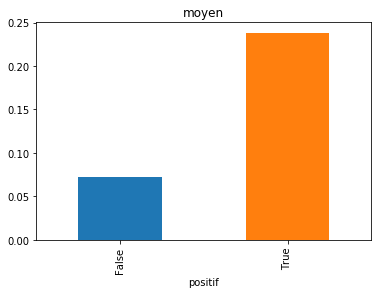

In [19]:
%matplotlib inline
DataBase.groupby(["positif"])["fConc1"].mean().plot.bar(title="moyen")

### Modélisation

In [20]:
#importation des librarie pour éffectuer la modelisation
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
#verification des données 
df = pd.get_dummies(df)
df.shape

(19020, 13)

In [22]:
#X = dataset.data
#y = dataset.target
X = df[df.columns[:1]]
y = df[df.columns[-1]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

#### Algorithme modele

In [24]:
from sklearn.metrics import accuracy_score

#le modele
algo   = RandomForestClassifier(random_state = 42,
                    n_jobs = -1,
                    n_estimators=16,
                    criterion='entropy',
                    max_depth=16
                    )
#Le fit pour x_train et y_train
modele = algo.fit(X_train, y_train)

# La prédiction
y_pred = algo.predict(X_test)

#Le resultat
accuracy_score(y_test, y_pred)

0.7139852786540484

### Optimisation des hyperparamètres

In [25]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_.score(X_test, y_test)

0.94776119403 0.969696969697


### Visualisation des performances

For model KNN accuracy = 0.7091482649842271


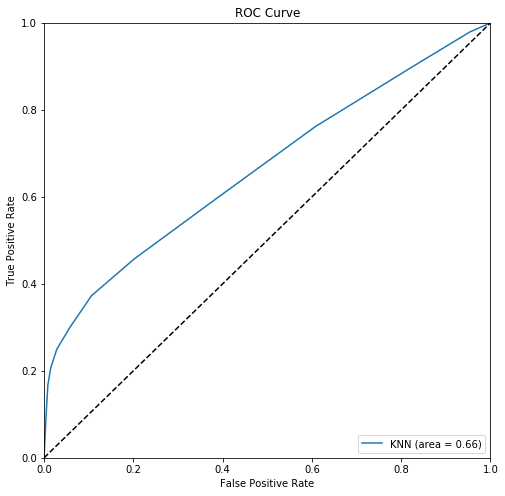

For model NB accuracy = 0.7053627760252366


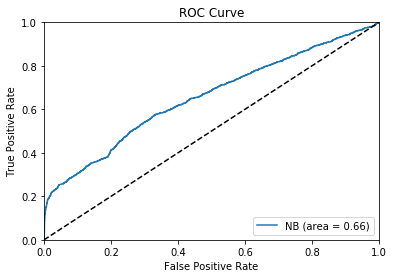

For model RF50 accuracy = 0.6363827549947424


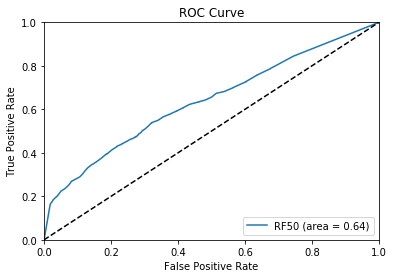

For model AdaBoost accuracy = 0.7295478443743428


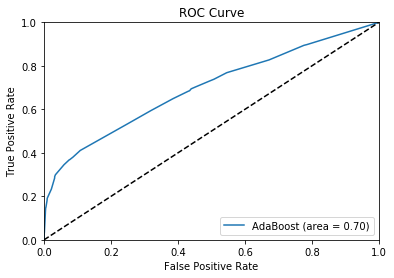

For model RF5 accuracy = 0.6363827549947424


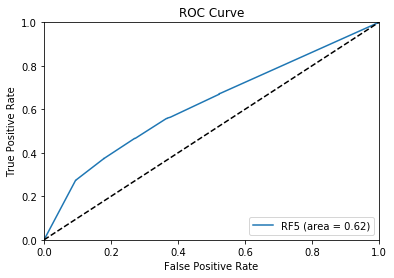

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,fbeta_score, make_scorer,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.metrics import roc_auc_score

#Utilisation du classifier 
#Import des librarie

classifiers = {'KNN': KNeighborsClassifier(n_neighbors=11),
               'NB': GaussianNB(),
               'RF5': RandomForestClassifier(n_estimators=5),
               'RF50': RandomForestClassifier(n_estimators=50),
               'AdaBoost': AdaBoostClassifier(),
               }

#taille du schéma
plt.figure(figsize=(8,8))

#classifier methode
#score teste X_test et y_test via y_pred
n_classifiers = len(classifiers)
for index, (name, clf) in enumerate(classifiers.iteritems()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    print 'For model', name, 'accuracy =', clf.score(X_test, y_test)


#Mise en place des paramettre d'affichage , insertion du roc     
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
